# K-Nearest Neighbors (KNN)

In [1]:
library(plyr)
library(ggplot2)
library(class)   # KNN
library(doBy)

## Example 2: use only columns (and visualization)

## 1. Exportory Data Analysis (EDA)

In [2]:
iris_data <- iris[,c("Sepal.Length", "Sepal.Width", "Species")]

In [3]:
head(iris_data)
tail(iris_data)
str(iris_data)
dim(iris_data)
summary(iris_data)

,Sepal.Length,Sepal.Width,Species
,<dbl>,<dbl>,<fct>
1,5.1,3.5,setosa
2,4.9,3.0,setosa
3,4.7,3.2,setosa
4,4.6,3.1,setosa
5,5.0,3.6,setosa
6,5.4,3.9,setosa


,Sepal.Length,Sepal.Width,Species
,<dbl>,<dbl>,<fct>
145,6.7,3.3,virginica
146,6.7,3.0,virginica
147,6.3,2.5,virginica
148,6.5,3.0,virginica
149,6.2,3.4,virginica
150,5.9,3.0,virginica


'data.frame':	150 obs. of  3 variables:
 $ Sepal.Length: num  5.1 4.9 4.7 4.6 5 5.4 4.6 5 4.4 4.9 ...
 $ Sepal.Width : num  3.5 3 3.2 3.1 3.6 3.9 3.4 3.4 2.9 3.1 ...
 $ Species     : Factor w/ 3 levels "setosa","versicolor",..: 1 1 1 1 1 1 1 1 1 1 ...


[1] 150   3

  Sepal.Length    Sepal.Width          Species  
 Min.   :4.300   Min.   :2.000   setosa    :50  
 1st Qu.:5.100   1st Qu.:2.800   versicolor:50  
 Median :5.800   Median :3.000   virginica :50  
 Mean   :5.843   Mean   :3.057                  
 3rd Qu.:6.400   3rd Qu.:3.300                  
 Max.   :7.900   Max.   :4.400                  

## 2. Rearrange data and reset the rownames

### Rearrange data

In [4]:
iris_df <- orderBy(~ -Species, iris_data)
head(iris_df)

,Sepal.Length,Sepal.Width,Species
,<dbl>,<dbl>,<fct>
101,6.3,3.3,virginica
102,5.8,2.7,virginica
103,7.1,3.0,virginica
104,6.3,2.9,virginica
105,6.5,3.0,virginica
106,7.6,3.0,virginica


### Reset index

In [5]:
rownames(iris_df) <- c()
head(iris_df)
tail(iris_df)
str(iris_df)

,Sepal.Length,Sepal.Width,Species
,<dbl>,<dbl>,<fct>
1,6.3,3.3,virginica
2,5.8,2.7,virginica
3,7.1,3.0,virginica
4,6.3,2.9,virginica
5,6.5,3.0,virginica
6,7.6,3.0,virginica


,Sepal.Length,Sepal.Width,Species
,<dbl>,<dbl>,<fct>
145,5.1,3.8,setosa
146,4.8,3.0,setosa
147,5.1,3.8,setosa
148,4.6,3.2,setosa
149,5.3,3.7,setosa
150,5.0,3.3,setosa


'data.frame':	150 obs. of  3 variables:
 $ Sepal.Length: num  6.3 5.8 7.1 6.3 6.5 7.6 4.9 7.3 6.7 7.2 ...
 $ Sepal.Width : num  3.3 2.7 3 2.9 3 3 2.5 2.9 2.5 3.6 ...
 $ Species     : Factor w/ 3 levels "setosa","versicolor",..: 3 3 3 3 3 3 3 3 3 3 ...


### Check the numbers of each species

In [6]:
nrow(subset(iris_df, Species == 'setosa'))
nrow(subset(iris_df, Species == 'versicolor'))
nrow(subset(iris_df, Species == 'virginica'))

[1] 50

[1] 50

[1] 50

## 3. Spliting the data into training set and test set

In [7]:
set.seed(1234)
samp <- c(sample(1:50, 35), sample(51:100, 35), sample(101:150, 35))

train_set <- iris_df[samp, -3]
head(train_set)

test_set <- iris_df[-samp, -3]
head(test_set)

,Sepal.Length,Sepal.Width
,<dbl>,<dbl>
28,6.1,3.0
16,6.4,3.2
22,5.6,2.8
37,6.3,3.4
44,6.8,3.2
9,6.7,2.5


,Sepal.Length,Sepal.Width
,<dbl>,<dbl>
1,6.3,3.3
7,4.9,2.5
10,7.2,3.6
11,6.5,3.2
13,6.8,3.0
17,6.5,3.0


In [8]:
dim(train_set)
dim(test_set)

[1] 105   2

[1] 45  2

We can know the accuracy of the model by testing how well 
the model predicts red squres as correct ones.

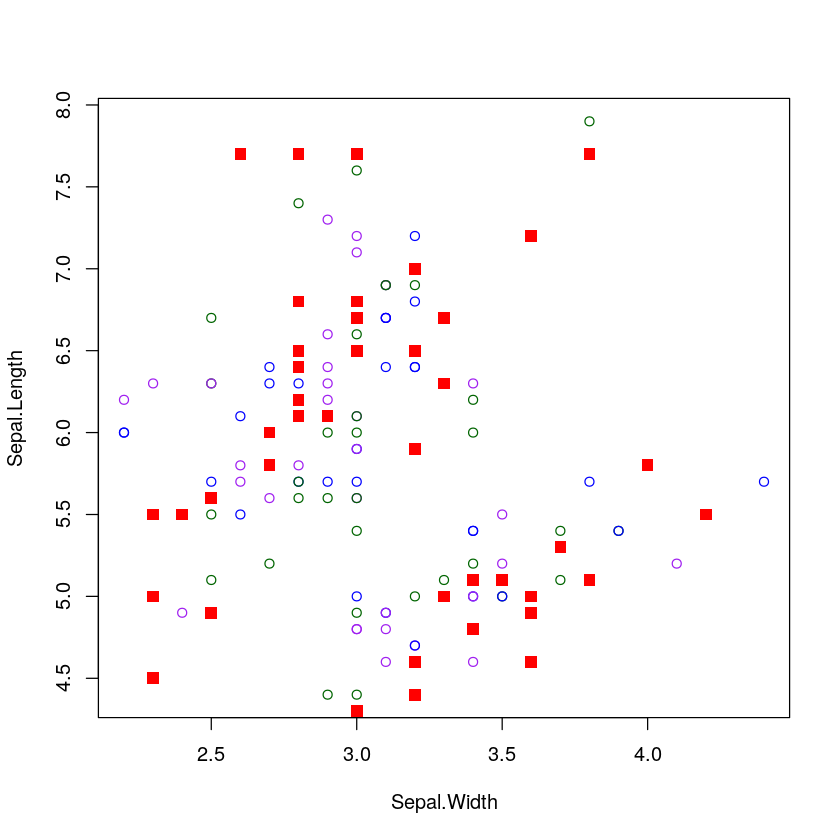

In [9]:
plot(Sepal.Length ~ Sepal.Width, data = train_set, 
     col = c("purple", "blue", "dark green"))

points(Sepal.Length ~ Sepal.Width, data = test_set,
      pch = 15, col = "red", cex = 1.3)

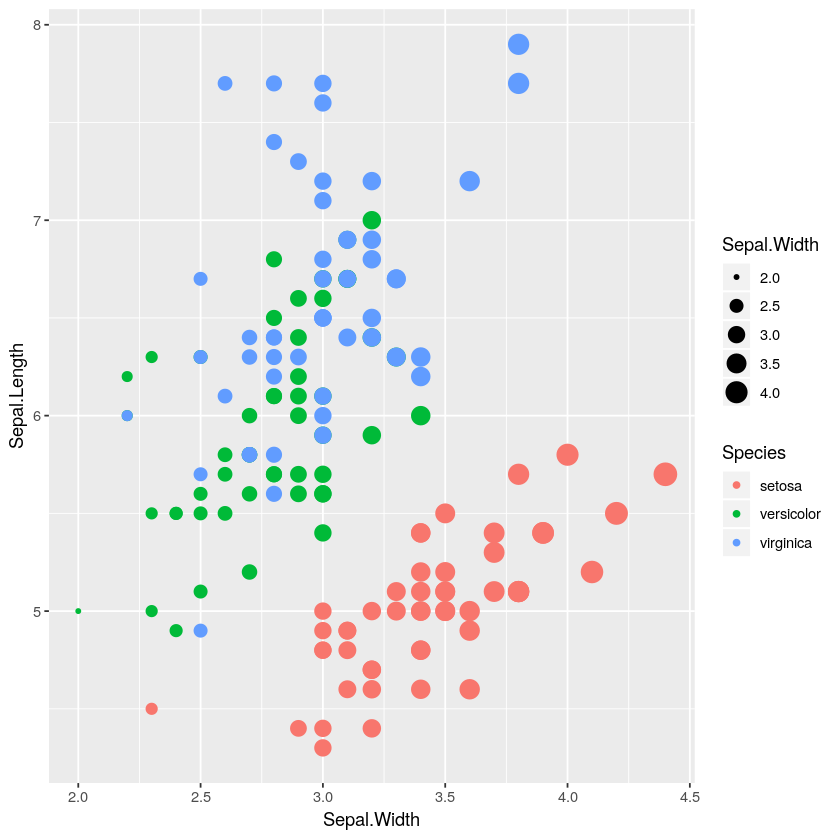

In [10]:
qplot(Sepal.Width, Sepal.Length, data= iris_data, col = Species, size = Sepal.Width)

## 4. Create factors of true classification

### Factor of true classification

In [11]:
train_y <- iris_df[samp, 3] # factor of true classification
train_y

[1] virginica  virginica  virginica  virginica  virginica  virginica 
  [7] virginica  virginica  virginica  virginica  virginica  virginica 
 [13] virginica  virginica  virginica  virginica  virginica  virginica 
 [19] virginica  virginica  virginica  virginica  virginica  virginica 
 [25] virginica  virginica  virginica  virginica  virginica  virginica 
 [31] virginica  virginica  virginica  virginica  virginica  versicolor
 [37] versicolor versicolor versicolor versicolor versicolor versicolor
 [43] versicolor versicolor versicolor versicolor versicolor versicolor
 [49] versicolor versicolor versicolor versicolor versicolor versicolor
 [55] versicolor versicolor versicolor versicolor versicolor versicolor
 [61] versicolor versicolor versicolor versicolor versicolor versicolor
 [67] versicolor versicolor versicolor versicolor setosa     setosa    
 [73] setosa     setosa     setosa     setosa     setosa     setosa    
 [79] setosa     setosa     setosa     setosa     setosa     setosa    
 [85] setosa     setosa     setosa     setosa     setosa     setosa    
 [91] setosa     setosa     setosa     setosa     setosa     setosa    
 [97] setosa     setosa     setosa     setosa     setosa     setosa    
[103] setosa     setosa     setosa    
Levels: setosa versicolor virginica

## 5. Create target to compare with modelling results

### Target

In [12]:
test_y <- iris_df[-samp, 3]
test_y

[1] virginica  virginica  virginica  virginica  virginica  virginica 
 [7] virginica  virginica  virginica  virginica  virginica  virginica 
[13] virginica  virginica  virginica  versicolor versicolor versicolor
[19] versicolor versicolor versicolor versicolor versicolor versicolor
[25] versicolor versicolor versicolor versicolor versicolor versicolor
[31] setosa     setosa     setosa     setosa     setosa     setosa    
[37] setosa     setosa     setosa     setosa     setosa     setosa    
[43] setosa     setosa     setosa    
Levels: setosa versicolor virginica

## 6. Implement KKN model

```
knn(train=, test=, c1(factor of true classification)=, 
   k (num of neighbours considered) = )
```

### pre-run before finding optimal k

In [13]:
pre <- knn(train = train_set, test = test_set, cl = train_y, k = 5)

In [14]:
pre

[1] virginica  setosa     virginica  virginica  virginica  versicolor
 [7] virginica  virginica  virginica  virginica  virginica  virginica 
[13] virginica  versicolor virginica  virginica  versicolor virginica 
[19] virginica  versicolor versicolor versicolor versicolor versicolor
[25] virginica  versicolor versicolor versicolor versicolor versicolor
[31] setosa     setosa     setosa     setosa     setosa     setosa    
[37] setosa     setosa     setosa     setosa     setosa     setosa    
[43] setosa     setosa     setosa    
Levels: setosa versicolor virginica

In [15]:
mean(pre == test_y)

[1] 0.8444444

#### Find the optimal k that maximizes predictions

In [20]:
accuracy_k <- NULL
for(i in c(1:nrow(test_set))){
    set.seed(1234)
    knn_k = knn(train = train_set, test = test_set, cl = train_y, k = i)
    accuracy_k = c(accuracy_k, mean(test_y == knn_k))
}


In [21]:
df_accuracy <- data.frame(k = c(1:nrow(test_set)), accuracy = accuracy_k)
orderBy(~ -accuracy, df_accuracy)[1:10,]

,k,accuracy
,<int>,<dbl>
7,7,0.8888889
3,3,0.8666667
4,4,0.8444444
5,5,0.8444444
6,6,0.8444444
8,8,0.8444444
41,41,0.8444444
42,42,0.8444444
43,43,0.8444444


: KNN with k = 7 generates the most accurate result.

In [22]:
reRun <- knn(train = train_set, test = test_set, cl = train_y, k = 7)

In [24]:
mean(reRun == test_y)

[1] 0.8666667